In [1]:
## Boiler-plate code 
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()


llm = ChatGroq(
     model="llama-3.1-8b-instant",
     temperature=0
)

response = llm.invoke("What is the capital of sri lanka?")
print(response.content)


The capital of Sri Lanka is Colombo. However, the administrative capital is Sri Jayawardenepura Kotte.


In [5]:
from typing import TypedDict,List, Annotated
from operator import add 

class graph_schema(TypedDict):

    messages_manual: List
    #Using Reducer in Langgraph
    messages_auto: Annotated[List,add]

In [9]:
from langchain_core.messages import AIMessage,HumanMessage

def create_post(state: graph_schema) -> graph_schema:

    messages_manual = state['messages_manual']
    response_manual = llm.invoke(messages_manual).content 
    response__manual_ai = AIMessage(content=response_manual)
    state['messages_manual'] = messages_manual + [response__manual_ai]

    messages_auto = state['messages_auto']
    response_auto = llm.invoke(messages_auto).content
    response_auto_ai = AIMessage(content=response_auto)
    state['messages_auto'] = [response_auto_ai]

    return state


def curate_post(state: graph_schema) -> graph_schema:


    messages_manual = state['messages_manual']

    response_manual = llm.invoke(messages_manual).content
    response__manual_ai = AIMessage(content=response_manual)

    state['messages_manual'] = messages_manual + [response__manual_ai]

    messages_auto = state['messages_auto']
    response_auto = llm.invoke(messages_auto).content
    response_auto_ai = AIMessage(content=response_auto)
    state['messages_auto'] = [response_auto_ai]


    return state

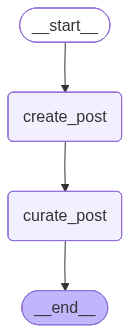

In [10]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(graph_schema)

graph.add_node("create_post", create_post)
graph.add_node("curate_post", curate_post)

graph.add_edge(START, "create_post")
graph.add_edge("create_post", "curate_post")
graph.add_edge("curate_post", END)

messages_graph = graph.compile()



from IPython.display import Image, display

# You could see the errors with the below command
Image(messages_graph.get_graph().draw_mermaid_png())

In [11]:
response = messages_graph.invoke(
    {"messages_manual": [HumanMessage(content="The importance of data privacy in the digital age")],
     "messages_auto": [HumanMessage(content="The importance of data privacy in the digital age")]}
)

In [12]:
response

{'messages_manual': [HumanMessage(content='The importance of data privacy in the digital age', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Data privacy has become a crucial concern in the digital age, where vast amounts of personal information are being collected, stored, and shared online. The importance of data privacy cannot be overstated, as it has significant implications for individuals, businesses, and society as a whole.\n\n**Why is data privacy important?**\n\n1. **Protection of personal information**: Data privacy ensures that personal information, such as names, addresses, phone numbers, and financial data, is protected from unauthorized access, use, or disclosure.\n2. **Prevention of identity theft**: Data breaches and unauthorized access to personal information can lead to identity theft, which can result in financial loss, damage to credit scores, and emotional distress.\n3. **Preservation of trust**: When individuals trust organizations with their p